In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import hpfspec
import hpfspecmatch

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
DIRNAME: /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspecmatch-0.1.1-py3.8.egg
/home/sejones/anaconda3/lib/python3.8/site-packages/hpfspecmatch-0.1.1-py3.8.egg/library/20210811_specmatch_nir/FITS


In [2]:
targetfile1 = '../library/20210811_specmatch_nir/FITS/Slope-20181010T034716_R01.optimal.fits' # targetname='GJ 908'
targetfile2 = '../library/20210811_specmatch_nir/FITS/Slope-20190228T122907_R01.optimal.fits' # targetname='GJ 507.1'
order = 5

In [3]:
hpfspecmatch.spectra_subtract(targetfile1,targetfile2,order)

AttributeError: module 'hpfspecmatch' has no attribute 'spectra_subtract'

In [5]:
max(H1.w_shifted[order][0],H2.w_shifted[order][0])

8657.954120990535

In [6]:
min(H1.w_shifted[order][-1],H2.w_shifted[order][-1])

8768.672436267021

In [7]:
H1.w_shifted[order]

array([8657.95412099, 8658.01781758, 8658.08150613, ..., 8769.76272077,
       8769.80786501, 8769.85299947])

In [8]:
H2.w_shifted[order]

array([8656.78815653, 8656.85184455, 8656.91552473, ..., 8768.58216923,
       8768.62730764, 8768.67243627])

In [10]:
w = np.linspace(max(H1.w_shifted[order][0],H2.w_shifted[order][0]),min(H1.w_shifted[order][-1],H2.w_shifted[order][-1]),num=10000)
w

array([8657.95412099, 8657.96519393, 8657.97626687, ..., 8768.65029039,
       8768.66136333, 8768.67243627])

In [ ]:
#8659,8760

Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.1-py3.8.egg/hpfspec/data/target_files/GJ_908.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
RVabs iteration #1: -71.16667+- 0.00000km/s
RVabs iteration #2: -71.16895+- 0.00000km/s
berv=-9.551354231556372,rv=-71.16894549807968
Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.1-py3.8.egg/hpfspec/data/target_files/GJ_507.1.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
RVabs iteration #1: -11.66667+- 0.00000km/s
RVabs iteration #2: -11.69888+- 0.00000km/s
berv=9.604799547477148,rv=-11.698877557219749


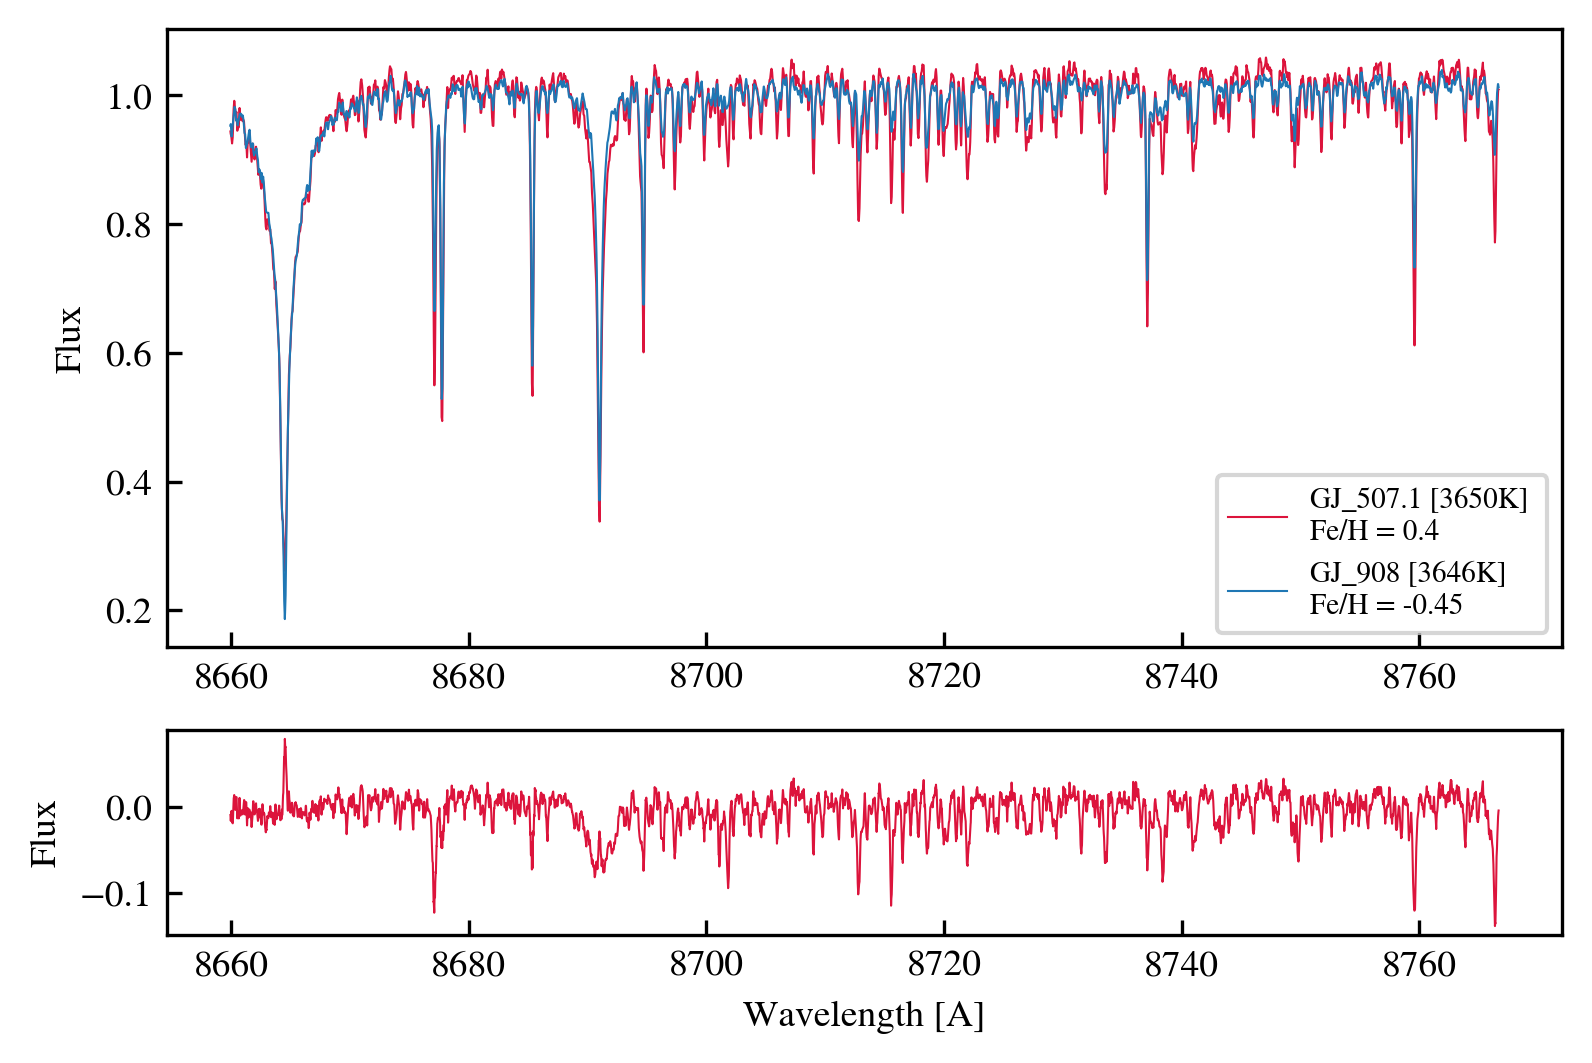

In [21]:
H1 = hpfspec.HPFSpectrum(targetfile1)
H2 = hpfspec.HPFSpectrum(targetfile2)

df = pd.read_csv(hpfspecmatch.config.PATH_LIBRARY_DB)
    
w = np.linspace(max(H1.w_shifted[order][0],H2.w_shifted[order][0])+2,min(H1.w_shifted[order][-1],H2.w_shifted[order][-1])-2,num=10000)
f_H1,e_H1 = H1.resample_order(w)
f_H2,e_H2 = H2.resample_order(w)
    
fig, (ax, bx) = plt.subplots(nrows=2,dpi=300,gridspec_kw={'height_ratios':[3,1]})
if sum(f_H1-f_H2 > 0) > sum(f_H2-f_H1 > 0):
    ax.plot(w,f_H1,lw=0.5,c='crimson',label='{} [{}K] \nFe/H = {}'.format(H1.object, int(df.loc[df.OBJECT == H1.object,'Teff'].values[0]),df.loc[df.OBJECT == H1.object,'[Fe/H]'].values[0]))
    ax.plot(w,f_H2,lw=0.5,label='{} [{}K] \nFe/H = {}'.format(H2.object, int(df.loc[df.OBJECT == H2.object,'Teff'].values[0]),df.loc[df.OBJECT == H2.object,'[Fe/H]'].values[0]))
    bx.plot(w,f_H1-f_H2,lw=0.5,c='crimson',label='flux subtraction')

else:
    ax.plot(w,f_H2,lw=0.5,c='crimson',label='{} [{}K] \nFe/H = {}'.format(H2.object, int(df.loc[df.OBJECT == H2.object,'Teff'].values[0]),df.loc[df.OBJECT == H2.object,'[Fe/H]'].values[0]))
    ax.plot(w,f_H1,lw=0.5,label='{} [{}K] \nFe/H = {}'.format(H1.object, int(df.loc[df.OBJECT == H1.object,'Teff'].values[0]),df.loc[df.OBJECT == H1.object,'[Fe/H]'].values[0]))
    bx.plot(w,f_H2-f_H1,lw=0.5,c='crimson',label='flux subtraction')
    
ax.set_ylabel('Flux')
bx.set_ylabel('Flux')
bx.set_xlabel('Wavelength [A]')
ax.legend(fontsize=7)

In [9]:
sum(f_H1-f_H2 > 0)

4927

In [10]:
if sum(f_H1-f_H2 > 0) > sum(f_H2-f_H1 > 0)

5073

In [16]:
df = pd.read_csv('../library/20210811_specmatch_nir/20210808_spec_mann_w_files_qual1_pass3.csv')
df

,OBJECT,source,Teff,e_Teff,[Fe/H],e_[Fe/H],log(g),e_log(g),FILE,simbadnames_x,ID_NAME,OBJECT_ID,filename,exptime,sn18,qprog,rv,basenames,simbadnames_y
0,GJ_9066,Mann,3080.0,60.0,-0.16,0.08,5.053,0.053,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,TIC_404715018|LSPM_J0200+1303|UCAC2__36403434|...,Gaia_DR2_76868614540049408,GJ_9066,../library/20210807_library/spec_mann/FITS/Slo...,969.15,487.130005,HET20-2-300,-28.569498,Slope-20200724T102147_R01.optimal.fits,TIC_404715018|LSPM_J0200+1303|UCAC2__36403434|...
1,Ross_128,Mann,3192.0,60.0,-0.02,0.08,5.076,0.050,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,TIC_325275315|PLX_2730|LSPM_J1147+0048|ASCC_11...,Gaia_DR2_3796072592206250624,Ross_128,../library/20210807_library/spec_mann/FITS/Slo...,617.70,575.633179,ENG20-2-003,-31.078666,Slope-20200406T041204_R01.optimal.fits,TIC_325275315|PLX_2730|LSPM_J1147+0048|ASCC_11...
2,GJ_15_B,Mann,3218.0,60.0,-0.30,0.08,5.072,0.051,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,TIC_440109718|ASCC__373580|2MASS_J00182549+440...,Gaia_DR2_385334196532776576,GJ_15_B,../library/20210807_library/spec_mann/FITS/Slo...,649.65,523.086914,ENG19-3-003,10.941464,Slope-20191119T060341_R01.optimal.fits,TIC_440109718|ASCC__373580|2MASS_J00182549+440...
3,GJ_105_B,Mann,3284.0,60.0,-0.12,0.03,4.941,0.049,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,TIC_278962913|LSPM_J0236+0652|2MASS_J02361535+...,Gaia_DR2_18565464288396416,GJ_105_B,../library/20210807_library/spec_mann/FITS/Slo...,969.15,487.895020,PSU20-1-001,26.274138,Slope-20200108T040109_R01.optimal.fits,TIC_278962913|LSPM_J0236+0652|2MASS_J02361535+...
4,GJ_1148,Mann,3304.0,61.0,0.07,0.08,4.814,0.053,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,TIC_115869504|WISEA_J114144.08+424506.2|Gaia_D...,Gaia_DR2_772430527947893632,GJ_1148,../library/20210807_library/spec_mann/FITS/Slo...,969.15,409.223083,PSU19-1-009,-9.053908,Slope-20190320T034635_R01.optimal.fits,TIC_115869504|WISEA_J114144.08+424506.2|Gaia_D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,PM_J20034+2951,Mann2015,3144.0,60.0,0.06,0.08,5.050,0.060,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,TIC_239481097|PLX_4756|WDS_J20036+2954B|LSPM_J...,Gaia_DR2_2029432043779954432,PM_J20034+2951,../library/20210807_library/spec_mann/FITS/Slo...,617.70,111.339958,PSU19-2-004,-44.803637,Slope-20190403T112908_R01.optimal.fits,TIC_239481097|PLX_4756|WDS_J20036+2954B|LSPM_J...
162,PM_J20112+1611,Mann2015,3217.0,61.0,-0.15,0.03,4.970,0.070,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,TIC_87216644|2MASS_J20111329+1611074|LSPM_J201...,Gaia_DR2_1809359465717142656,PM_J20112+1611,../library/20210807_library/spec_mann/FITS/Slo...,617.70,132.252350,PSU19-2-004,-48.523961,Slope-20190409T112848_R01.optimal.fits,TIC_87216644|2MASS_J20111329+1611074|LSPM_J201...
163,GJ_1253,Mann2015,3045.0,60.0,0.14,0.08,5.090,0.060,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,TIC_352617553|LSPM_J2026+5834|NLTT_49289|2MASS...,Gaia_DR2_2188318517720321664,GJ_1253,../library/20210807_library/spec_mann/FITS/Slo...,969.15,177.044647,UT20-3-005,-59.893277,Slope-20200903T060556_R01.optimal.fits,TIC_352617553|LSPM_J2026+5834|NLTT_49289|2MASS...
164,GJ_905,Mann2015,2930.0,60.0,0.23,0.08,5.040,0.060,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,TIC_176974026|[FS2003]_1203|1RXS_J234155.0+441...,Gaia_DR2_1926461164913660160,GJ_905,../library/20210807_library/spec_mann/FITS/Slo...,649.65,507.769836,HET19-3-300,-77.905480,Slope-20191024T014430_R01.optimal.fits,TIC_176974026|[FS2003]_1203|1RXS_J234155.0+441...


In [7]:
df['Teff']

0      3080.0
1      3192.0
2      3218.0
3      3284.0
4      3304.0
        ...  
161    3144.0
162    3217.0
163    3045.0
164    2930.0
165    3173.0
Name: Teff, Length: 166, dtype: float64

In [19]:
df.loc[df.OBJECT == 'GJ_908']['Teff']

33    3646.0
Name: Teff, dtype: float64

In [18]:
df['Teff'].loc[df.OBJECT == 'GJ_908']

33    3646.0
Name: Teff, dtype: float64

In [22]:
df.loc[df.OBJECT == 'GJ_908','Teff'].values[0]

3646.0

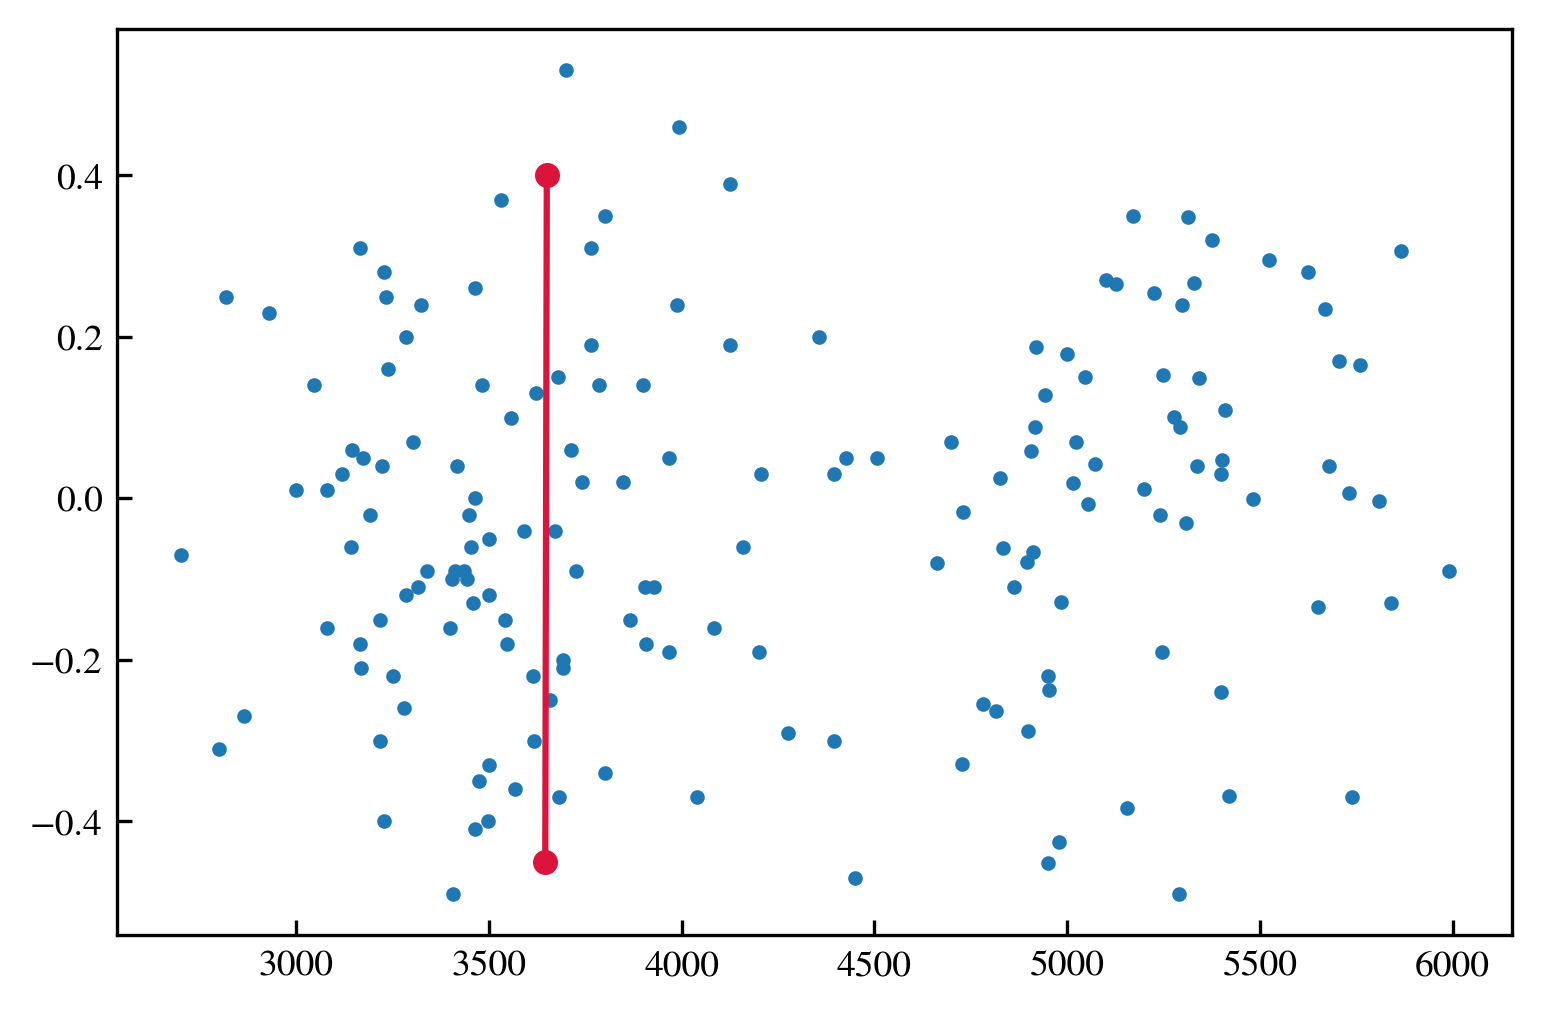

In [13]:
fig, ax = plt.subplots(dpi=300)
ax.plot(df['Teff'],df['[Fe/H]'], marker='.', lw=0)
ax.plot([3646,3650],[-.45,.4], color='crimson', marker='.', ms=10)

In [14]:
low_feh = hpfspec.HPFSpectrum('../library/20210811_specmatch_nir/FITS/Slope-20181010T034716_R01.optimal.fits', targetname='GJ 908')
high_feh = hpfspec.HPFSpectrum('../library/20210811_specmatch_nir/FITS/Slope-20190228T122907_R01.optimal.fits', targetname='GJ 507.1')

Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.1-py3.8.egg/hpfspec/data/target_files/GJ 908.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
RVabs iteration #1: -71.16667+- 0.00000km/s
RVabs iteration #2: -71.16895+- 0.00000km/s
berv=-9.551354231556372,rv=-71.16894549807968
Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.1-py3.8.egg/hpfspec/data/target_files/GJ 507.1.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
RVabs iteration #1: -11.66667+- 0.00000km/s
RVabs iteration #2: -11.69888+- 0.00000km/s
berv=9.604799547477148,rv=-11.698877557219749


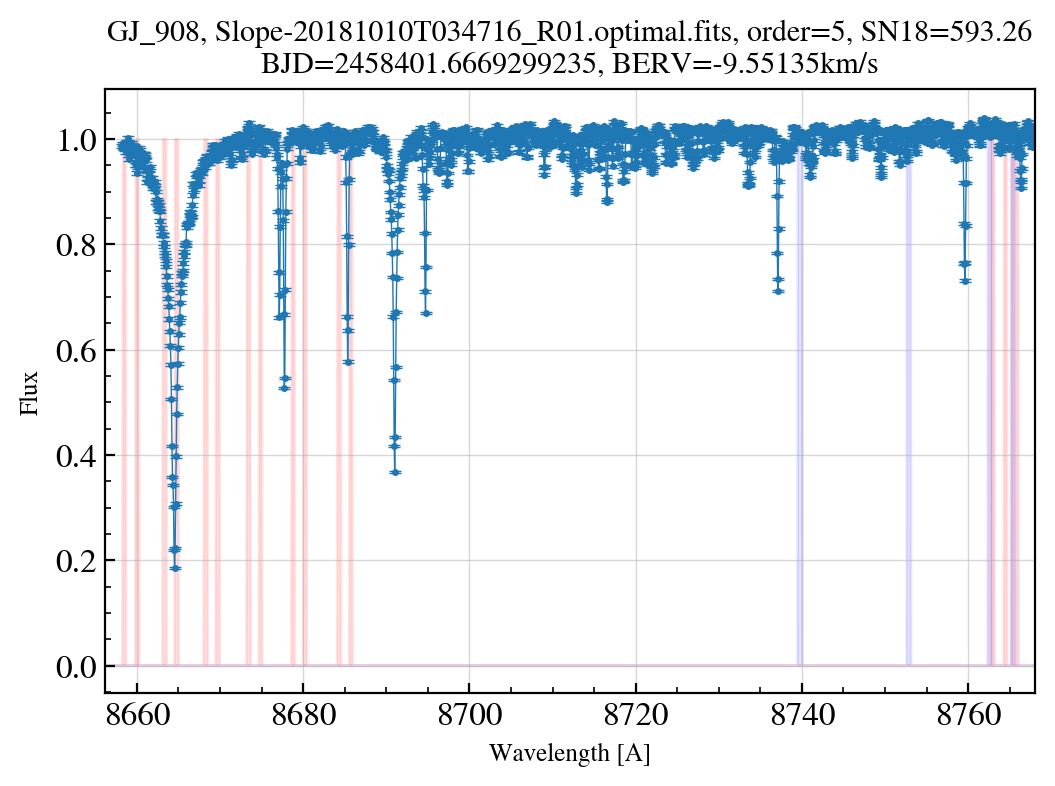

In [25]:
low_feh.plot_order(5,deblazed=True,shifted=True)

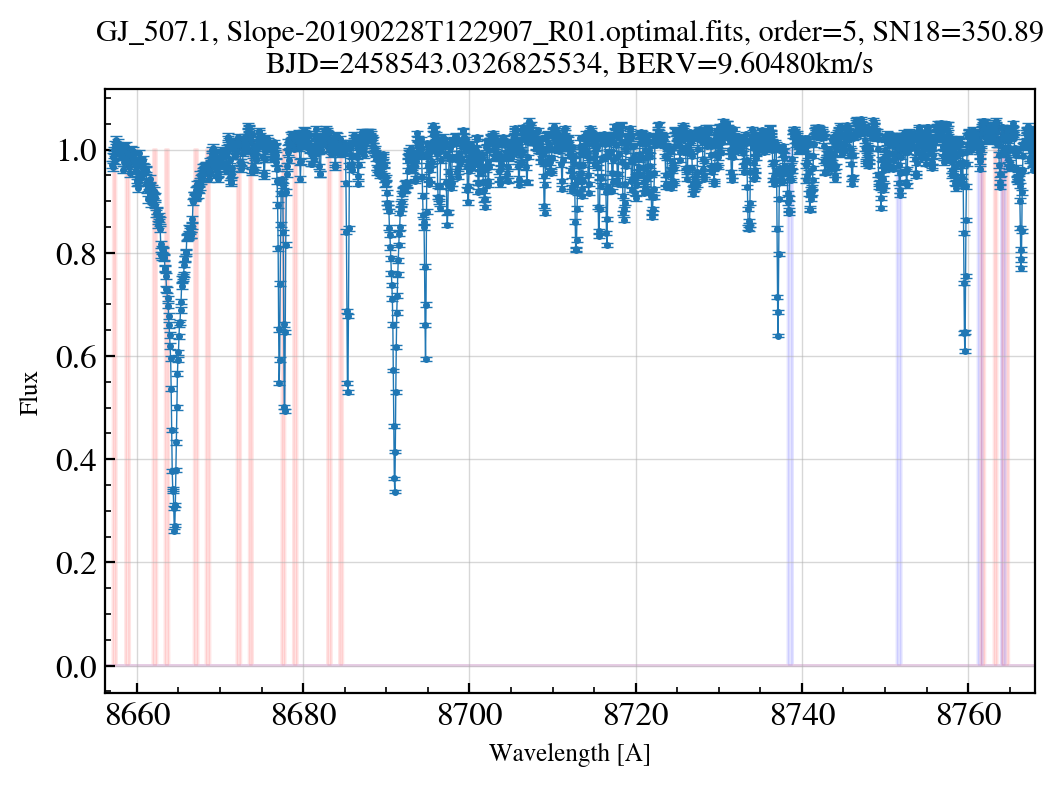

In [24]:
high_feh.plot_order(5,deblazed=True,shifted=True)

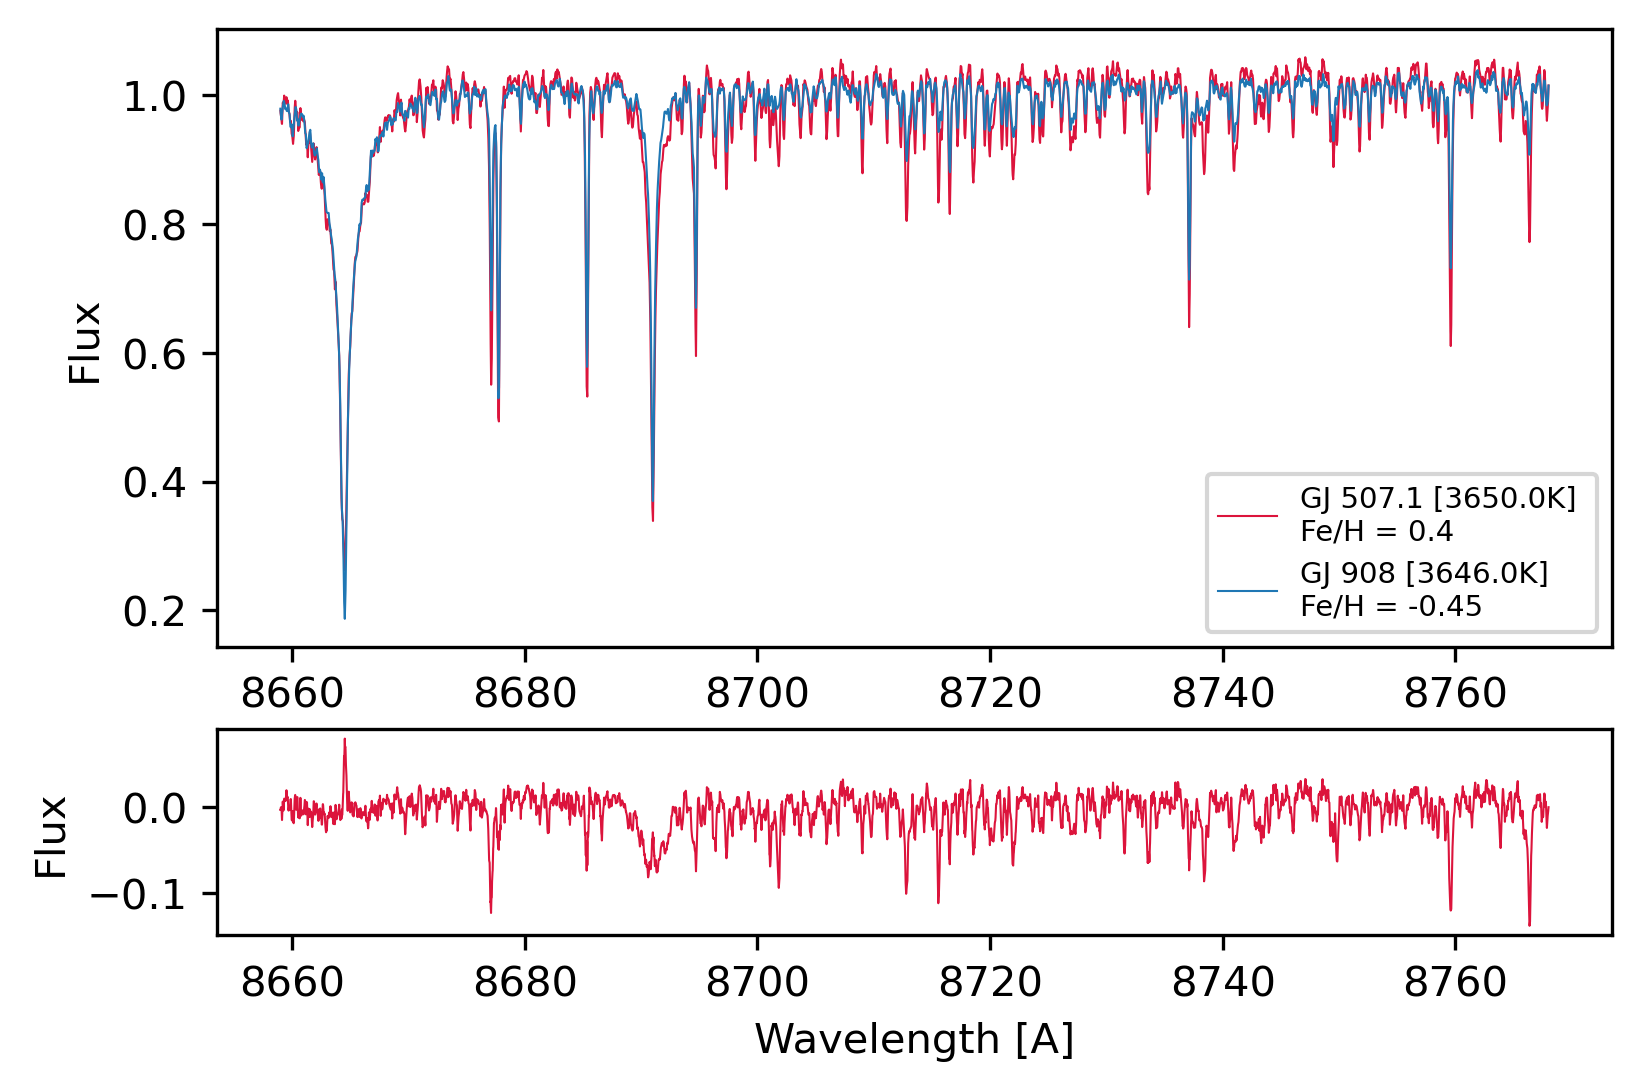

In [26]:
w = np.linspace(8659,8768,num=10000)
f_low,e_low = low_feh.resample_order(w)
f_high,e_high = high_feh.resample_order(w)

fig, (ax, bx) = plt.subplots(nrows=2,dpi=300,gridspec_kw={'height_ratios':[3,1]})
ax.plot(w,f_high,lw=0.5,c='crimson',label='GJ 507.1 [{}K] \nFe/H = 0.4'.format(df.loc[df.OBJECT == high_feh.object,'Teff'].values[0]))
ax.plot(w,f_low,lw=0.5,label='GJ 908 [{}K] \nFe/H = -0.45'.format(df.loc[df.OBJECT == low_feh.object,'Teff'].values[0]))

bx.plot(w,f_high-f_low,lw=0.5,c='crimson',label='flux high-low')

ax.set_ylabel('Flux')
bx.set_ylabel('Flux')
bx.set_xlabel('Wavelength [A]')
ax.legend(fontsize=7)

In [2]:
def spectra_subtract(targetfile1,targetfile2,order,library_csv=hpfspecmatch.config.PATH_LIBRARY_DB):
    H1 = hpfspec.HPFSpectrum(targetfile1)
    H2 = hpfspec.HPFSpectrum(targetfile2)

    df = pd.read_csv(library_csv)

    w = np.linspace(max(H1.w_shifted[order][0],H2.w_shifted[order][0])+2,min(H1.w_shifted[order][-1],H2.w_shifted[order][-1])-2,num=10000)
    f_H1,e_H1 = H1.resample_order(w)
    f_H2,e_H2 = H2.resample_order(w)

    fig, (ax, bx) = plt.subplots(nrows=2,dpi=300,gridspec_kw={'height_ratios':[3,1]})
    if sum(f_H1-f_H2 > 0) > sum(f_H2-f_H1 > 0):
        ax.plot(w,f_H1,lw=0.5,c='crimson',label='{} [{}K] \nFe/H = {}'.format(H1.object, int(df.loc[df.OBJECT == H1.object,'Teff'].values[0]),df.loc[df.OBJECT == H1.object,'[Fe/H]'].values[0]))
        ax.plot(w,f_H2,lw=0.5,label='{} [{}K] \nFe/H = {}'.format(H2.object, int(df.loc[df.OBJECT == H2.object,'Teff'].values[0]),df.loc[df.OBJECT == H2.object,'[Fe/H]'].values[0]))
        bx.plot(w,f_H1-f_H2,lw=0.5,c='crimson',label='flux subtraction')

    else:
        ax.plot(w,f_H2,lw=0.5,c='crimson',label='{} [{}K] \nFe/H = {}'.format(H2.object, int(df.loc[df.OBJECT == H2.object,'Teff'].values[0]),df.loc[df.OBJECT == H2.object,'[Fe/H]'].values[0]))
        ax.plot(w,f_H1,lw=0.5,label='{} [{}K] \nFe/H = {}'.format(H1.object, int(df.loc[df.OBJECT == H1.object,'Teff'].values[0]),df.loc[df.OBJECT == H1.object,'[Fe/H]'].values[0]))
        bx.plot(w,f_H2-f_H1,lw=0.5,c='crimson',label='flux subtraction')

    ax.set_ylabel('Flux')
    bx.set_ylabel('Flux')
    bx.set_xlabel('Wavelength [A]')
    ax.legend(fontsize=7)

In [3]:
targetfile1 = '../library/20210811_specmatch_nir/FITS/Slope-20181010T034716_R01.optimal.fits' # targetname='GJ 908'
targetfile2 = '../library/20210811_specmatch_nir/FITS/Slope-20190228T122907_R01.optimal.fits' # targetname='GJ 507.1'
order = 5

Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.1-py3.8.egg/hpfspec/data/target_files/GJ_908.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
RVabs iteration #1: -71.16667+- 0.00000km/s
RVabs iteration #2: -71.16895+- 0.00000km/s
berv=-9.551354231556372,rv=-71.16894549807968
Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.1-py3.8.egg/hpfspec/data/target_files/GJ_507.1.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
RVabs iteration #1: -11.66667+- 0.00000km/s
RVabs iteration #2: -11.69888+- 0.00000km/s
berv=9.604799547477148,rv=-11.698877557219749


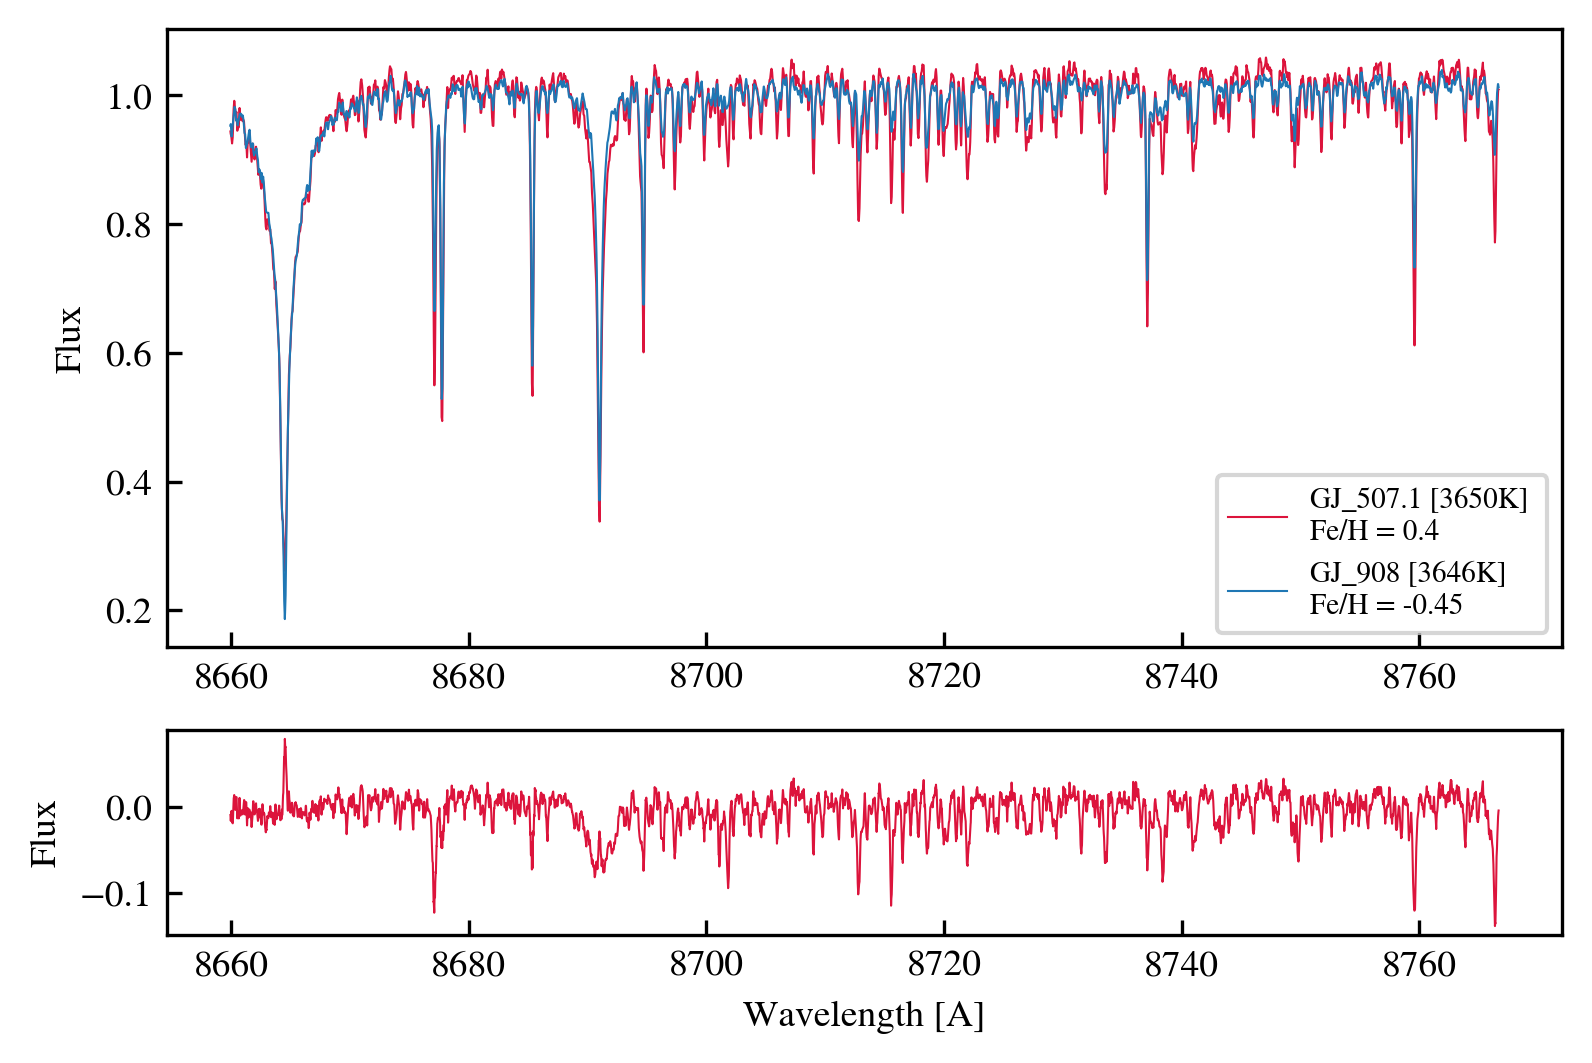

In [4]:
spectra_subtract(targetfile1,targetfile2,order,library_csv=hpfspecmatch.config.PATH_LIBRARY_DB)

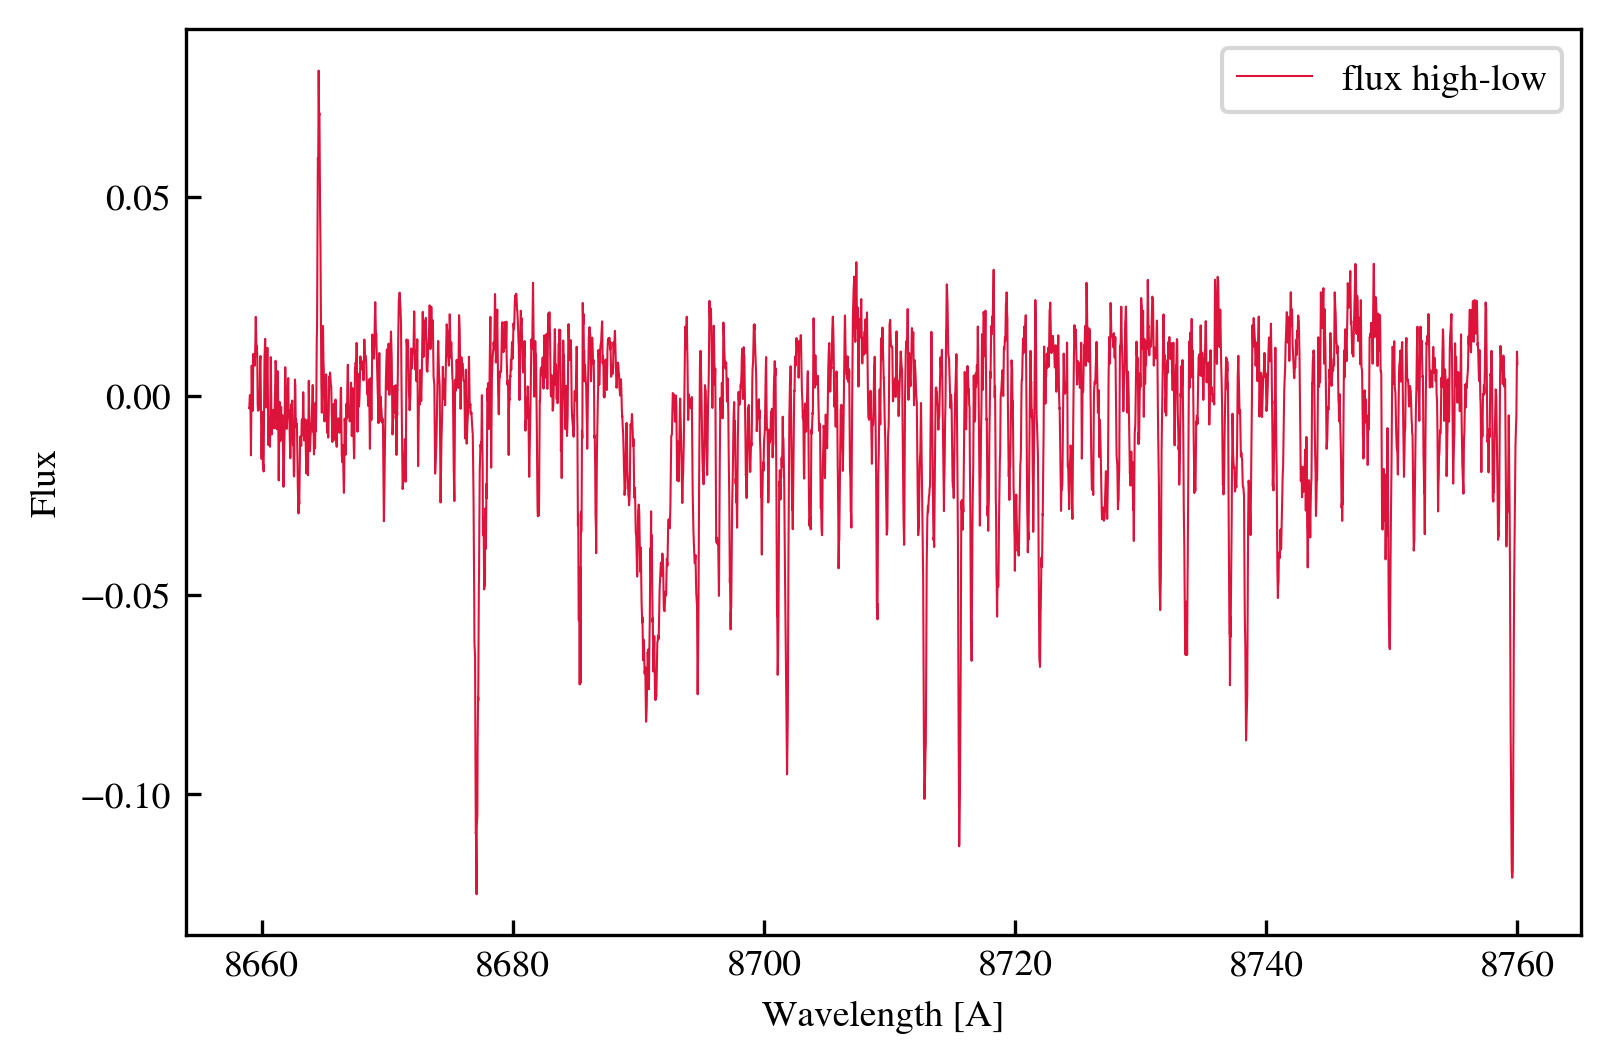

In [47]:
fig, ax = plt.subplots(dpi=300)
ax.plot(w,f_high-f_low,lw=0.5,c='crimson',label='flux high-low')

ax.set_xlabel('Wavelength [A]')
ax.set_ylabel('Flux')
ax.legend()